# __Linear Regression__

__HOUSING DATASET__

### Code - Load dependences

In [40]:
import warnings
warnings.filterwarnings('ignore')

In [133]:
import os
import tarfile
import urllib.request

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.feature_selection import SelectKBest, f_classif, f_regression
from sklearn.metrics import accuracy_score, roc_auc_score, mean_absolute_error, r2_score

# Import metrics.
from sklearn.metrics import mean_squared_error, r2_score

In [42]:
pd.set_option('display.max_columns', 50)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
#sns.set_theme(style='ticks')

### Download the Data

In [43]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

#fetch_housing_data()

### Take a Quick Look at the Data Structure

In [44]:
HOUSING_PATH = '/Users/gblasd/Documents/DataScience/02_SupervisedLearning/data/housing/'

In [45]:
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [46]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.230,37.880,41.000,880.000,129.000,322.000,126.000,8.325,452600.000,NEAR BAY
1,-122.220,37.860,21.000,7099.000,1106.000,2401.000,1138.000,8.301,358500.000,NEAR BAY
2,-122.240,37.850,52.000,1467.000,190.000,496.000,177.000,7.257,352100.000,NEAR BAY
3,-122.250,37.850,52.000,1274.000,235.000,558.000,219.000,5.643,341300.000,NEAR BAY
4,-122.250,37.850,52.000,1627.000,280.000,565.000,259.000,3.846,342200.000,NEAR BAY


In [47]:
housing.shape

(20640, 10)

In [48]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [49]:
housing.isnull().sum() / housing.shape[0]*100

longitude            0.000
latitude             0.000
housing_median_age   0.000
total_rooms          0.000
total_bedrooms       1.003
population           0.000
households           0.000
median_income        0.000
median_house_value   0.000
ocean_proximity      0.000
dtype: float64

<Axes: xlabel='ocean_proximity'>

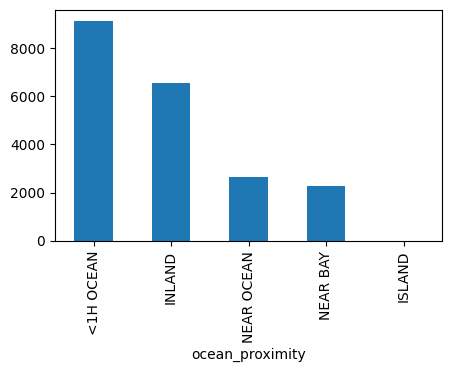

In [50]:
housing['ocean_proximity'].value_counts().plot(kind='bar', figsize=(5, 3))

In [51]:
housing.describe(percentiles=[.01, .25, .50, .75, .99])

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000,20640.000,20640.000,20640.000,20433.000,20640.000,20640.000,20640.000,20640.000
mean,-119.570,35.632,28.639,2635.763,537.871,1425.477,499.540,3.871,206855.817
std,2.004,2.136,12.586,2181.615,421.385,1132.462,382.330,1.900,115395.616
min,-124.350,32.540,1.000,2.000,1.000,3.000,1.000,0.500,14999.000
1%,-123.220,32.680,4.000,164.000,36.000,88.000,31.000,1.070,50000.000
25%,-121.800,33.930,18.000,1447.750,296.000,787.000,280.000,2.563,119600.000
50%,-118.490,34.260,29.000,2127.000,435.000,1166.000,409.000,3.535,179700.000
75%,-118.010,37.710,37.000,3148.000,647.000,1725.000,605.000,4.743,264725.000
99%,-116.290,40.626,52.000,11212.110,2221.360,5805.830,1982.660,10.597,500001.000
max,-114.310,41.950,52.000,39320.000,6445.000,35682.000,6082.000,15.000,500001.000


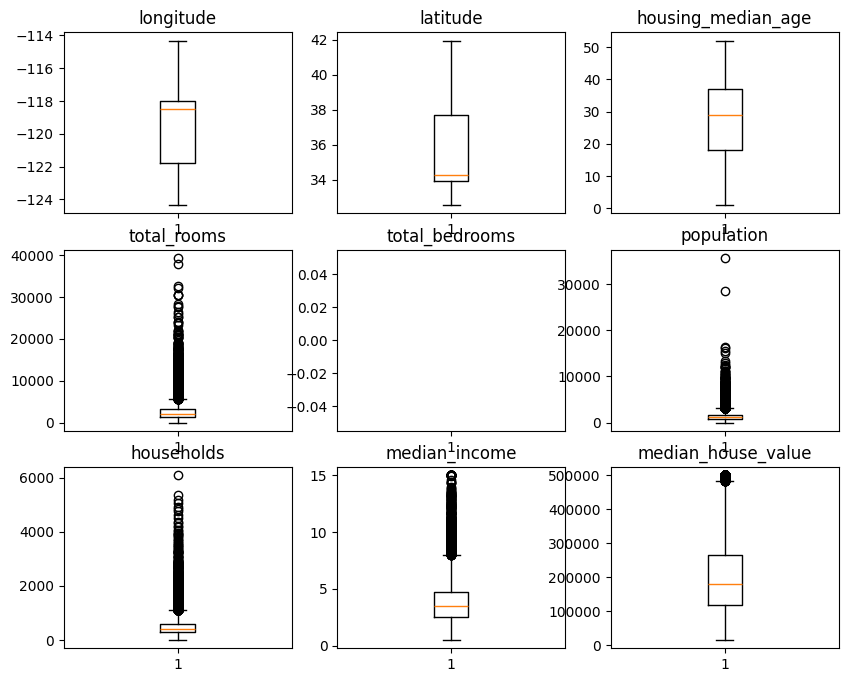

In [52]:
import matplotlib.pyplot as plt
import numpy as np

# numeric columns in DataFrame
col_df_num = housing.select_dtypes(exclude=['object', 'datetime64']).columns.to_list()

n_cols = 3
n_rows = 3

#fig = plt.figure(layout="constrained", figsize=(10, 10))
fig = plt.figure(figsize=(10, 8))
ax_array = fig.subplots(n_rows, n_cols, squeeze=False)

index_col = 0
for row in range(n_rows):
    for col in range(n_cols):
        ax_array[row, col].boxplot(housing[col_df_num[index_col]])
        ax_array[row, col].set_title(col_df_num[index_col])
        index_col += 1
        # to avoid error, break loop
        if index_col >= len(col_df_num):
            break

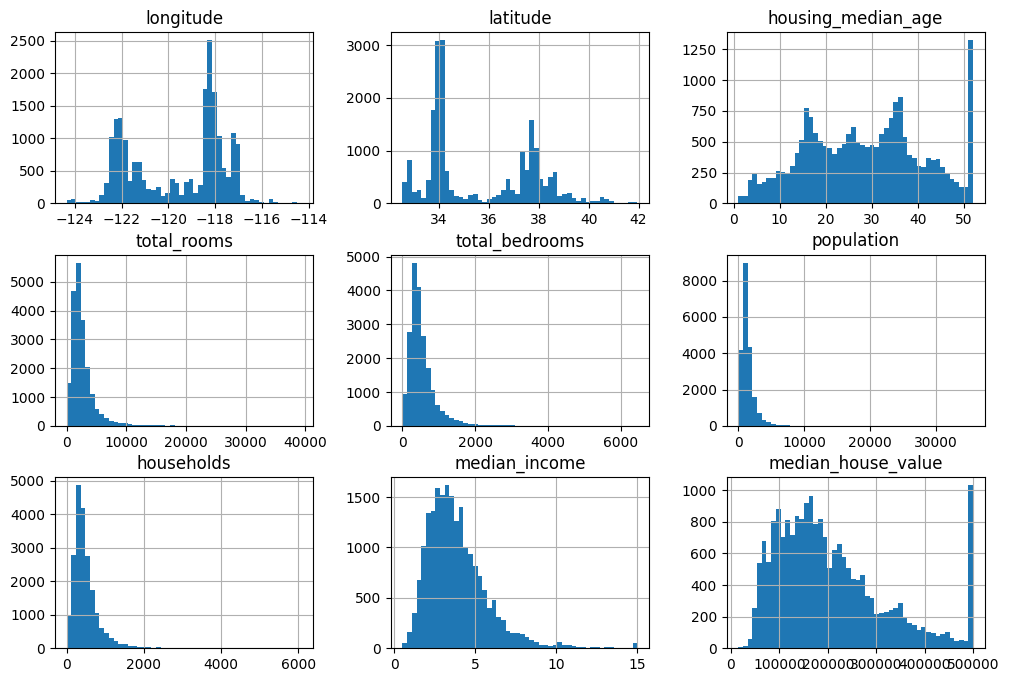

In [53]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(12,8))
plt.show()

### Visualizing Geographical Data

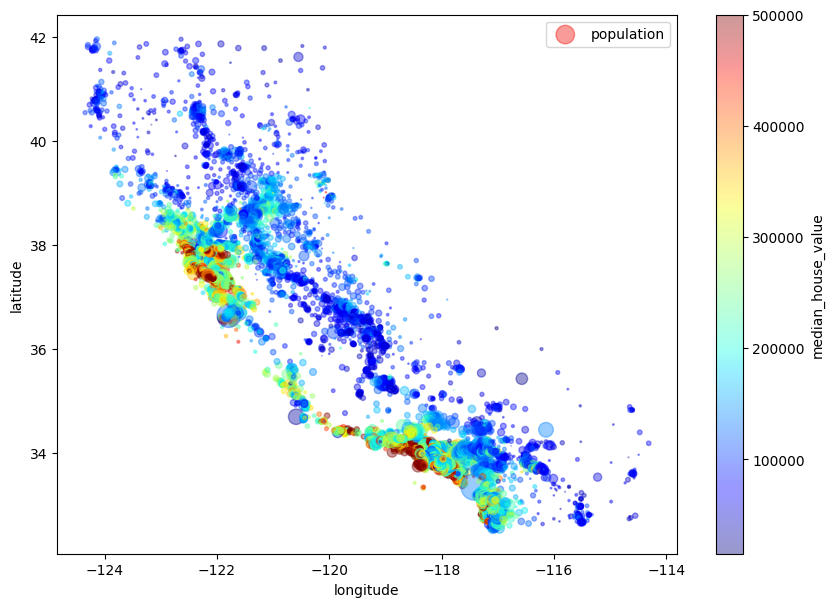

In [54]:
housing.plot(kind='scatter', 
            x='longitude', 
            y='latitude', 
            alpha=0.4, 
            s=housing['population']/100, 
            label="population", 
            figsize=(10, 7),
            c='median_house_value', 
            cmap=plt.get_cmap('jet'), 
            colorbar=True)

plt.legend()

### Looking for correlations

In [55]:
housing.select_dtypes(include='float64')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.230,37.880,41.000,880.000,129.000,322.000,126.000,8.325,452600.000
1,-122.220,37.860,21.000,7099.000,1106.000,2401.000,1138.000,8.301,358500.000
2,-122.240,37.850,52.000,1467.000,190.000,496.000,177.000,7.257,352100.000
3,-122.250,37.850,52.000,1274.000,235.000,558.000,219.000,5.643,341300.000
4,-122.250,37.850,52.000,1627.000,280.000,565.000,259.000,3.846,342200.000
...,...,...,...,...,...,...,...,...,...
20635,-121.090,39.480,25.000,1665.000,374.000,845.000,330.000,1.560,78100.000
20636,-121.210,39.490,18.000,697.000,150.000,356.000,114.000,2.557,77100.000
20637,-121.220,39.430,17.000,2254.000,485.000,1007.000,433.000,1.700,92300.000
20638,-121.320,39.430,18.000,1860.000,409.000,741.000,349.000,1.867,84700.000


In [56]:
corr_matrix = housing.select_dtypes(include='float64').corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000
median_income         0.688
total_rooms           0.134
housing_median_age    0.106
households            0.066
total_bedrooms        0.050
population           -0.025
longitude            -0.046
latitude             -0.144
Name: median_house_value, dtype: float64

In [57]:
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000,-0.925,-0.108,0.045,0.070,0.100,0.055,-0.015,-0.046
latitude,-0.925,1.000,0.011,-0.036,-0.067,-0.109,-0.071,-0.080,-0.144
housing_median_age,-0.108,0.011,1.000,-0.361,-0.320,-0.296,-0.303,-0.119,0.106
total_rooms,0.045,-0.036,-0.361,1.000,0.930,0.857,0.918,0.198,0.134
total_bedrooms,0.070,-0.067,-0.320,0.930,1.000,0.878,0.980,-0.008,0.050
population,0.100,-0.109,-0.296,0.857,0.878,1.000,0.907,0.005,-0.025
households,0.055,-0.071,-0.303,0.918,0.980,0.907,1.000,0.013,0.066
median_income,-0.015,-0.080,-0.119,0.198,-0.008,0.005,0.013,1.000,0.688
median_house_value,-0.046,-0.144,0.106,0.134,0.050,-0.025,0.066,0.688,1.000


array([[<Axes: xlabel='longitude', ylabel='longitude'>,
        <Axes: xlabel='latitude', ylabel='longitude'>,
        <Axes: xlabel='housing_median_age', ylabel='longitude'>,
        <Axes: xlabel='total_rooms', ylabel='longitude'>,
        <Axes: xlabel='total_bedrooms', ylabel='longitude'>,
        <Axes: xlabel='population', ylabel='longitude'>,
        <Axes: xlabel='households', ylabel='longitude'>,
        <Axes: xlabel='median_income', ylabel='longitude'>,
        <Axes: xlabel='median_house_value', ylabel='longitude'>],
       [<Axes: xlabel='longitude', ylabel='latitude'>,
        <Axes: xlabel='latitude', ylabel='latitude'>,
        <Axes: xlabel='housing_median_age', ylabel='latitude'>,
        <Axes: xlabel='total_rooms', ylabel='latitude'>,
        <Axes: xlabel='total_bedrooms', ylabel='latitude'>,
        <Axes: xlabel='population', ylabel='latitude'>,
        <Axes: xlabel='households', ylabel='latitude'>,
        <Axes: xlabel='median_income', ylabel='latitude'>,
    

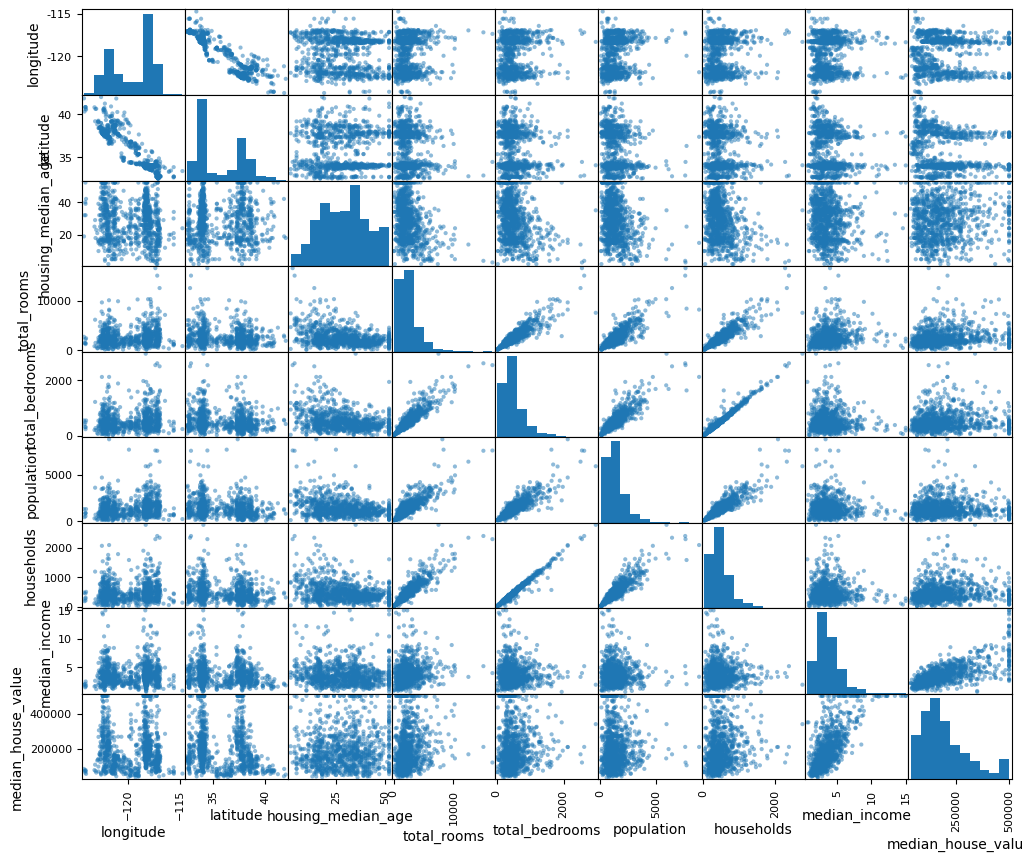

In [58]:
from pandas.plotting import scatter_matrix
%matplotlib inline
attributes = housing.select_dtypes(include='float64').columns.to_list()
scatter_matrix(housing[attributes].sample(1000), figsize=(12, 10))

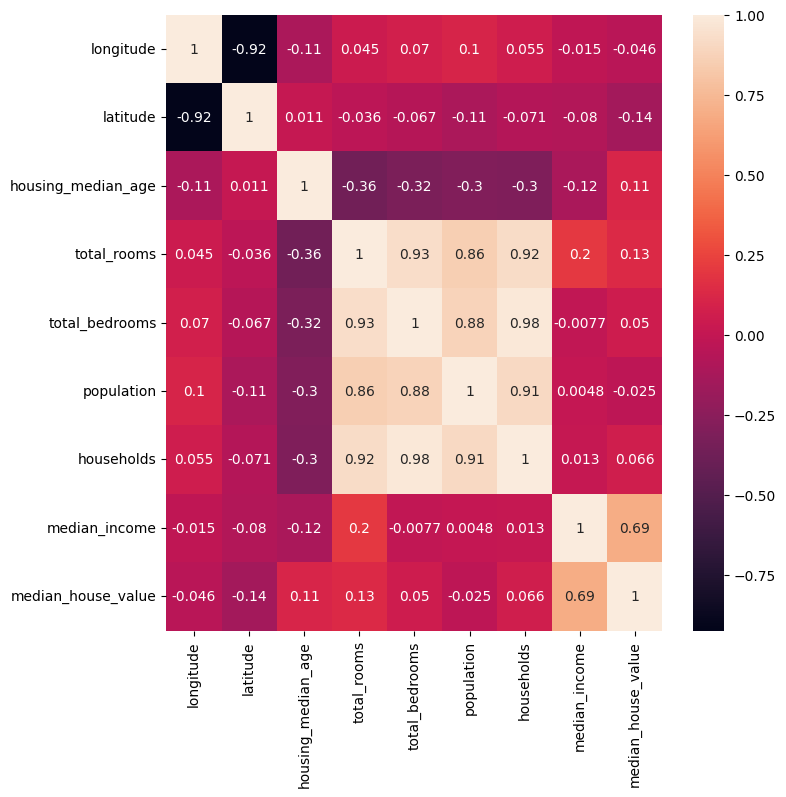

In [59]:
corr_df = housing.select_dtypes(include='float64').corr()
plt.figure(figsize=(8,8))
sns.heatmap( corr_df , annot=True )
plt.show()

### Experimenting with Attribute Combinations

In [60]:
housing["rooms_per_household"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"] /housing["total_rooms"]
housing["population_per_household"] = housing["population"] / housing["households"]

array([[<Axes: xlabel='rooms_per_household', ylabel='rooms_per_household'>,
        <Axes: xlabel='bedrooms_per_room', ylabel='rooms_per_household'>,
        <Axes: xlabel='population_per_household', ylabel='rooms_per_household'>],
       [<Axes: xlabel='rooms_per_household', ylabel='bedrooms_per_room'>,
        <Axes: xlabel='bedrooms_per_room', ylabel='bedrooms_per_room'>,
        <Axes: xlabel='population_per_household', ylabel='bedrooms_per_room'>],
       [<Axes: xlabel='rooms_per_household', ylabel='population_per_household'>,
        <Axes: xlabel='bedrooms_per_room', ylabel='population_per_household'>,
        <Axes: xlabel='population_per_household', ylabel='population_per_household'>]],
      dtype=object)

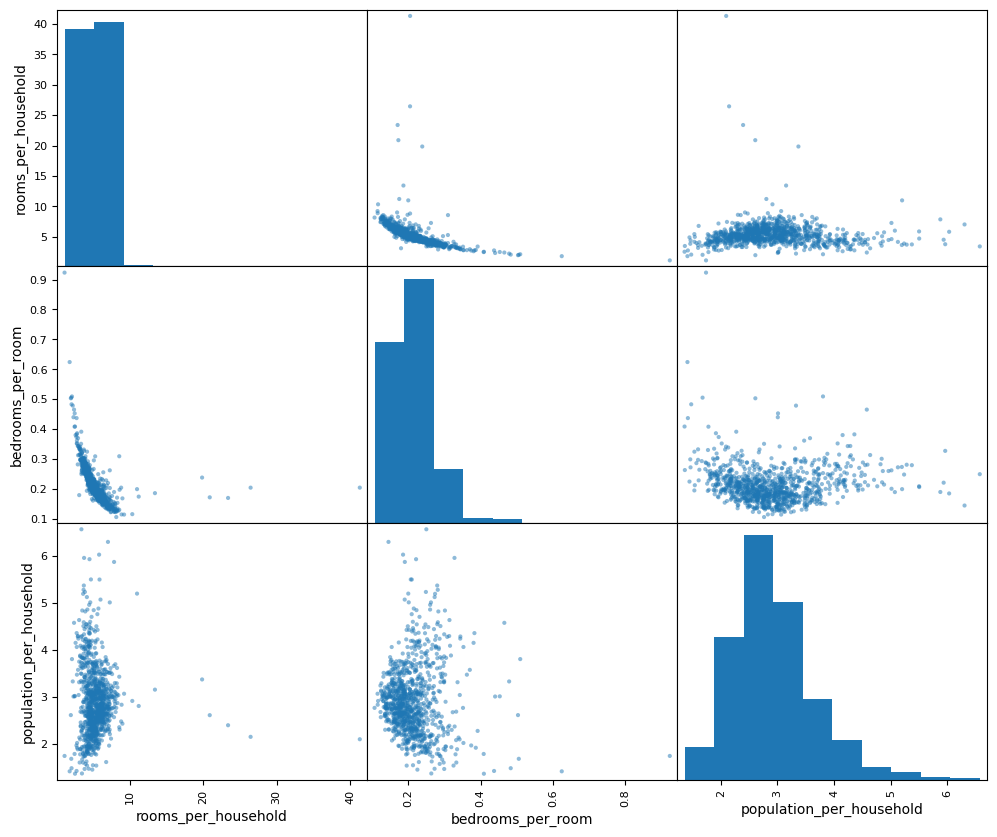

In [61]:
attributes = ["rooms_per_household", "bedrooms_per_room", "population_per_household"]
scatter_matrix(housing[attributes].sample(1000), figsize=(12, 10))

In [62]:
housing.sample(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
4263,-118.330,34.100,43.000,2732.000,1646.000,3049.000,1429.000,1.316,333300.000,<1H OCEAN,1.912,0.602,2.134
5439,-118.440,34.010,42.000,2061.000,396.000,907.000,393.000,6.080,420000.000,<1H OCEAN,5.244,0.192,2.308
337,-122.170,37.740,46.000,769.000,183.000,693.000,178.000,2.250,84200.000,NEAR BAY,4.320,0.238,3.893
303,-122.180,37.770,27.000,909.000,236.000,396.000,157.000,2.079,97500.000,NEAR BAY,5.790,0.260,2.522
13353,-117.620,34.020,16.000,2040.000,325.000,1207.000,324.000,5.043,164100.000,INLAND,6.296,0.159,3.725
10087,-117.970,33.940,36.000,1870.000,338.000,947.000,324.000,4.120,217000.000,<1H OCEAN,5.772,0.181,2.923
19278,-122.720,38.430,31.000,2020.000,476.000,1408.000,437.000,2.574,131100.000,<1H OCEAN,4.622,0.236,3.222
20571,-121.990,38.530,6.000,4598.000,834.000,2561.000,812.000,3.419,127300.000,INLAND,5.663,0.181,3.154
5372,-118.380,34.040,45.000,767.000,130.000,254.000,118.000,6.290,340400.000,<1H OCEAN,6.500,0.169,2.153
6068,-117.860,34.010,16.000,4632.000,NaN,3038.000,727.000,5.176,264400.000,<1H OCEAN,6.371,NaN,4.179


### Valores faltantes

In [63]:
housing.isna().sum() / housing.shape[0]*100

longitude                  0.000
latitude                   0.000
housing_median_age         0.000
total_rooms                0.000
total_bedrooms             1.003
population                 0.000
households                 0.000
median_income              0.000
median_house_value         0.000
ocean_proximity            0.000
rooms_per_household        0.000
bedrooms_per_room          1.003
population_per_household   0.000
dtype: float64

In [64]:
housing[housing['total_bedrooms'].isnull()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
290,-122.160,37.770,47.000,1256.000,NaN,570.000,218.000,4.375,161900.000,NEAR BAY,5.761,NaN,2.615
341,-122.170,37.750,38.000,992.000,NaN,732.000,259.000,1.620,85100.000,NEAR BAY,3.830,NaN,2.826
538,-122.280,37.780,29.000,5154.000,NaN,3741.000,1273.000,2.576,173400.000,NEAR BAY,4.049,NaN,2.939
563,-122.240,37.750,45.000,891.000,NaN,384.000,146.000,4.949,247100.000,NEAR BAY,6.103,NaN,2.630
696,-122.100,37.690,41.000,746.000,NaN,387.000,161.000,3.906,178400.000,NEAR BAY,4.634,NaN,2.404
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20267,-119.190,34.200,18.000,3620.000,NaN,3171.000,779.000,3.341,220500.000,NEAR OCEAN,4.647,NaN,4.071
20268,-119.180,34.190,19.000,2393.000,NaN,1938.000,762.000,1.695,167400.000,NEAR OCEAN,3.140,NaN,2.543
20372,-118.880,34.170,15.000,4260.000,NaN,1701.000,669.000,5.103,410700.000,<1H OCEAN,6.368,NaN,2.543
20460,-118.750,34.290,17.000,5512.000,NaN,2734.000,814.000,6.607,258100.000,<1H OCEAN,6.771,NaN,3.359


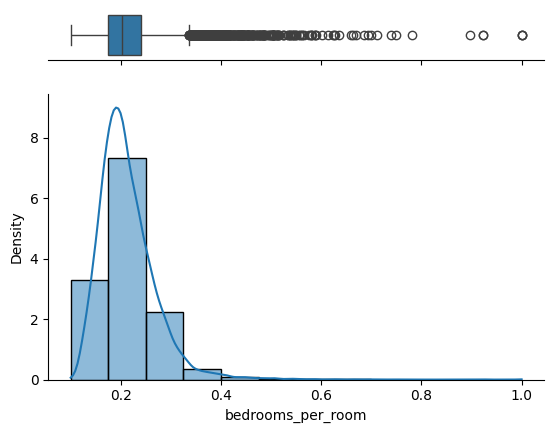

In [65]:
x = housing['bedrooms_per_room']

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(x=x, ax=ax_box)
sns.histplot(x=x, bins=12, kde=True, stat='density', ax=ax_hist)

ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)

In [66]:
print("Original size: ", housing.shape)
print("Total drop: ", housing[housing['total_bedrooms'] > float(housing['total_bedrooms'].quantile([.99]))].shape[0])
housing = housing[housing['total_bedrooms'] <= float(housing['total_bedrooms'].quantile([.99]))]
print("Final size: ", housing.shape)

Original size:  (20640, 13)
Total drop:  205
Final size:  (20228, 13)


In [67]:
housing[housing['total_bedrooms'].isnull()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household


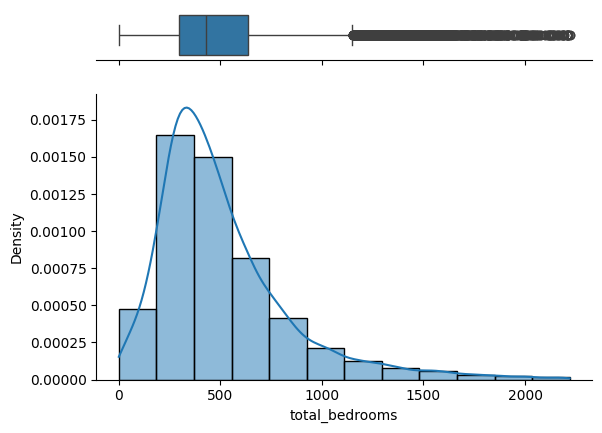

In [68]:
x = housing['total_bedrooms']

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(x=x, ax=ax_box)
sns.histplot(x=x, bins=12, kde=True, stat='density', ax=ax_hist)

ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)

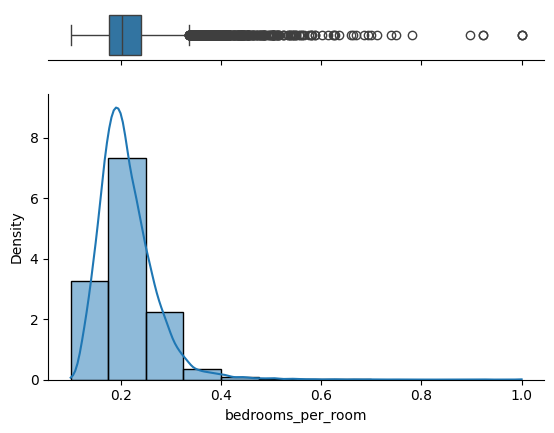

In [69]:
x = housing['bedrooms_per_room']

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(x=x, ax=ax_box)
sns.histplot(x=x, bins=12, kde=True, stat='density', ax=ax_hist)

ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)

In [70]:
print("Original size: ", housing.shape)
print("Total drop: ", housing[housing['bedrooms_per_room'] > float(housing['bedrooms_per_room'].quantile([.99]))].shape[0])
housing = housing[housing['bedrooms_per_room'] <= float(housing['bedrooms_per_room'].quantile([.99]))]
print("Final size: ", housing.shape)

Original size:  (20228, 13)
Total drop:  203
Final size:  (20025, 13)


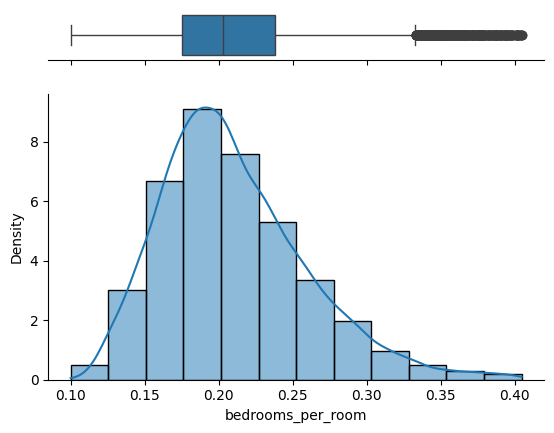

In [71]:
np.random.seed(2022)
x = housing['bedrooms_per_room']

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(x=x, ax=ax_box)
sns.histplot(x=x, bins=12, kde=True, stat='density', ax=ax_hist)

ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)

<Axes: xlabel='ocean_proximity'>

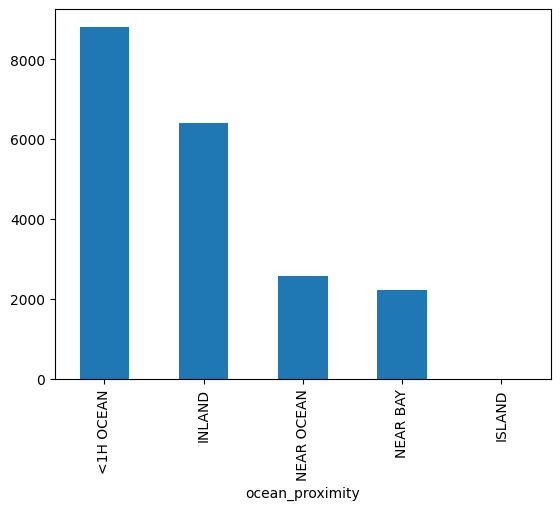

In [72]:
housing['ocean_proximity'].value_counts().plot(kind='bar')

<Axes: xlabel='ocean_proximity'>

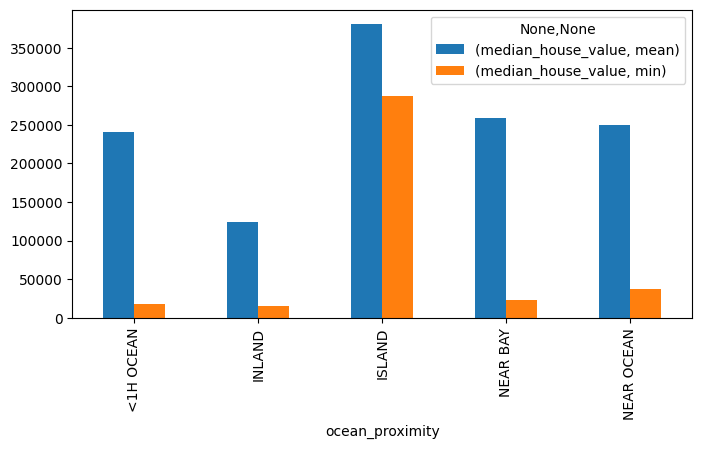

In [95]:
housing[['ocean_proximity', 'median_house_value']].groupby('ocean_proximity').agg(['mean', 'min']).plot(kind='bar', figsize=(8, 4))

In [122]:
pd.DataFrame(housing[['ocean_proximity', 'median_house_value']].groupby('ocean_proximity').agg(['mean']).reset_index().values).sort_values(by=1).reset_index(drop=True)

,0,1
0,INLAND,124525.523
1,<1H OCEAN,240466.582
2,NEAR OCEAN,249299.731
3,NEAR BAY,259345.482
4,ISLAND,380440.000


In [96]:
housing['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [139]:
def get_mean_by_ocean_proximity(proximity):
    match proximity:
        case 'INLAND':
            return 124525.523
        case '<1H OCEAN':
            return 240466.582
        case 'NEAR OCEAN':
            return 249299.731
        case 'NEAR BAY':
            return 259345.482
        case 'ISLAND':
            return 380440.000
        
        case _:
            return np.nan

In [140]:
housing['ocean_proximity_cont'] = housing['ocean_proximity'].map(lambda p: get_mean_by_ocean_proximity(p))

In [141]:
housing.isna().sum()

longitude                   0
latitude                    0
housing_median_age          0
total_rooms                 0
total_bedrooms              0
population                  0
households                  0
median_income               0
median_house_value          0
ocean_proximity             0
rooms_per_household         0
bedrooms_per_room           0
population_per_household    0
ocean_proximity_cont        0
dtype: int64

In [143]:
housing['ocean_proximity_cont'].describe()

count    20025.000
mean    206690.978
std      56652.115
min     124525.523
25%     124525.523
50%     240466.582
75%     240466.582
max     380440.000
Name: ocean_proximity_cont, dtype: float64

### Variables

In [144]:
housing.sample(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household,ocean_proximity_cont
17204,-119.740,34.440,26.000,4257.000,1031.000,1861.000,950.000,3.405,294500.000,NEAR OCEAN,4.481,0.242,1.959,249299.731
3316,-122.690,38.940,9.000,1245.000,234.000,517.000,187.000,3.125,93400.000,INLAND,6.658,0.188,2.765,124525.523
9889,-122.300,38.300,52.000,1128.000,207.000,450.000,197.000,3.354,154600.000,NEAR BAY,5.726,0.184,2.284,259345.482
9313,-122.510,37.980,37.000,4801.000,699.000,1830.000,679.000,6.076,487800.000,NEAR BAY,7.071,0.146,2.695,259345.482
14565,-117.200,32.840,32.000,2033.000,394.000,989.000,389.000,3.258,181400.000,NEAR OCEAN,5.226,0.194,2.542,249299.731
8397,-118.360,33.950,42.000,1139.000,302.000,1283.000,306.000,4.163,163900.000,<1H OCEAN,3.722,0.265,4.193,240466.582
2364,-119.590,36.720,18.000,1284.000,193.000,621.000,190.000,4.537,130600.000,INLAND,6.758,0.150,3.268,124525.523
4176,-118.220,34.100,33.000,1903.000,386.000,1187.000,340.000,4.047,196600.000,<1H OCEAN,5.597,0.203,3.491,240466.582
999,-121.820,37.690,12.000,1906.000,351.000,802.000,319.000,4.938,227700.000,INLAND,5.975,0.184,2.514,124525.523
10854,-117.870,33.690,4.000,2337.000,768.000,983.000,655.000,3.717,275000.000,<1H OCEAN,3.568,0.329,1.501,240466.582


In [146]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'rooms_per_household',
       'bedrooms_per_room', 'population_per_household',
       'ocean_proximity_cont'],
      dtype='object')

In [147]:
housing.shape

(20025, 14)

In [148]:
var_cat = ['ocean_proximity']

var_num = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'rooms_per_household','bedrooms_per_room', 'population_per_household',
       'ocean_proximity_cont']

var_tgt = ['median_house_value']

print(len(var_cat + var_num + var_tgt))

14


### Modelado

#### Preparación de sets

In [149]:
X = housing[ var_num ]
y = housing[ var_tgt ]

#### Mejores variables

In [150]:
kb = SelectKBest( k=5, score_func=f_regression )
kb.fit(X=X, y=y)

SelectKBest(k=5, score_func=<function f_regression at 0x150f2e8e0>)

In [151]:
kb.get_feature_names_out()

array(['total_rooms', 'median_income', 'rooms_per_household',
       'bedrooms_per_room', 'ocean_proximity_cont'], dtype=object)

In [154]:
ls_best = [ x for x, y in zip(X.columns, kb.get_support()) if y]
ls_best

['total_rooms',
 'median_income',
 'rooms_per_household',
 'bedrooms_per_room',
 'ocean_proximity_cont']

In [155]:
X = pd.DataFrame(kb.transform(X), columns=ls_best)
X

,total_rooms,median_income,rooms_per_household,bedrooms_per_room,ocean_proximity_cont
0,880.000,8.325,6.984,0.147,259345.482
1,7099.000,8.301,6.238,0.156,259345.482
2,1467.000,7.257,8.288,0.130,259345.482
3,1274.000,5.643,5.817,0.184,259345.482
4,1627.000,3.846,6.282,0.172,259345.482
...,...,...,...,...,...
20020,1665.000,1.560,5.045,0.225,124525.523
20021,697.000,2.557,6.114,0.215,124525.523
20022,2254.000,1.700,5.206,0.215,124525.523
20023,1860.000,1.867,5.330,0.220,124525.523


#### Conjunto de entrenamiento y validación

In [156]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

#### Estandarización de los datos

In [179]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


#### Modelos 

##### Regresión Lineal

In [180]:
model_linreg = LinearRegression()
model_linreg.fit(X_train_scaled, y_train)

LinearRegression()

In [181]:
model_linreg.score(X_train_scaled, y_train)

0.6092014309786506

In [182]:
ls_scores = cross_val_score(cv=4, estimator=model_linreg, X=X_train_scaled, y=y_train)
ls_scores

array([0.6105013 , 0.6128591 , 0.61737846, 0.59395457])

In [183]:
print("MEAN", np.mean(ls_scores))
print("STD", np.std(ls_scores))

MEAN 0.6086733579204955
STD 0.00884990699407686


#### Evaluación del modelo

In [185]:
# Make predictions.
y_pred = model_linreg.predict(X_test[X_train.columns])

# Calculate and print errors.
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2:.4f}")

mse = mean_squared_error(y_test, y_pred)
print(f"Mean squared error: {mse:.4f}")

rmse = mse ** 0.5
print(f"Root mean squared error: {rmse:.4f}")

mae = mean_absolute_error(y_pred=y_pred, y_true=y_test)
print(f"Mean Absolute Error: {mae:.4f}")

R-squared: -4230947245.4029
Mean squared error: 59116498859056611328.0000
Root mean squared error: 7688725437.8770
Mean Absolute Error: 7408071494.7861


In [186]:
model_linreg.coef_[0]

array([ 4844.12963555, 80631.42945317,  4488.89041079, 17577.84831903,
       36021.84638417])

In [187]:
X_test.shape[1]

5

In [188]:
model_linreg.coef_[0][1]

np.float64(80631.42945317479)

total_rooms = 4844.1296355467
median_income = 80631.4294531748
rooms_per_household = 4488.8904107903
bedrooms_per_room = 17577.8483190294
ocean_proximity_cont = 36021.8463841665
Intercept: [206801.962778]

Feature Coefficients:
                 Feature  Coefficient
0           total_rooms     4844.130
1         median_income    80631.429
2   rooms_per_household     4488.890
3     bedrooms_per_room    17577.848
4  ocean_proximity_cont    36021.846


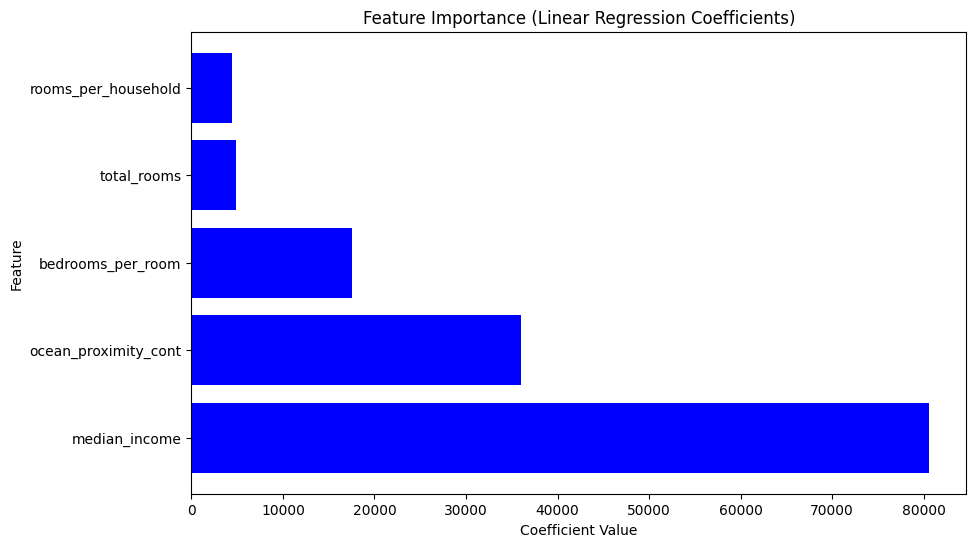

In [189]:
#print("Model coefficients:\n")
for i in range(X_test.shape[1]):
    print(X_test.columns[i], "=", model_linreg.coef_[0][i].round(10))

# Extraer información del modelo
print("Intercept:", model_linreg.intercept_)
coeff_df = pd.DataFrame({"Feature": X_test.columns, "Coefficient": model_linreg.coef_[0]})
print("\nFeature Coefficients:\n", coeff_df)

# Resumir los resultados del modelo 
# Sort dataframe by coefficients.
coef_df_sorted = coeff_df.sort_values(by="Coefficient", ascending=False)

# Create plot.
plt.figure(figsize=(10,6))
#plt.barh(coeff_df["Feature"], coef_df_sorted["Coefficient"], color="blue")
plt.barh(data=coef_df_sorted, y="Feature", width="Coefficient", color="blue")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.title("Feature Importance (Linear Regression Coefficients)")
plt.show()